In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sco
import scipy.stats as scs

In [2]:
df = pd.read_excel('industry.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [3]:
df

,State/UT,Rural Own Account Enterprises,Rural Establishment,All Rural,Urban Own Account Enterprises,Urban Establishment,All Urban,Rural Own Account Enterprises + Urban Own Account Enterprises,Rural Establishment + Urban Establishment,All Rural + All Urban,% Share
0,Uttar Pradesh,4448590,276634,4725225,3000750,657494,3658245,7449340,934129,8383469,14.54
1,West Bengal,4419182,296942,4716124,1990990,580888,2571878,6410173,877829,7288001,12.64
2,Andhra Pradesh,3046796,246293,3293090,1830143,476979,2307121,4876939,723273,5600211,9.71
3,Maharashtra,1780248,145686,1925935,2427433,803110,3230544,4207682,948797,5156479,8.94
4,Tamil Nadu,1441566,232127,1673693,2073604,719727,2793331,3515171,951854,4467024,7.75
5,Gujarat,831929,96866,928795,2241038,465257,2706296,3072967,562125,3635091,6.30
6,Karnataka,1322446,89202,1411647,978803,420797,1399599,2301248,509999,2811247,4.87
7,Madhya Pradesh,1238465,90610,1329075,1063680,201645,1265325,2302146,292255,2594400,4.50
8,Odisha,1858503,127780,1986284,367679,90854,458533,2226182,218634,2444818,4.24
9,Bihar,1715471,99818,1815288,396286,97032,493317,2111758,196850,2308608,4.00


In [4]:
#-------------------------DATA FOR SCATTERPLOT----------------------------#
all_r = np.array(df.iloc[:,3][:-1])
all_u = np.array(df.iloc[:,6][:-1])
log_r = np.log(all_r)
log_u = np.log(all_u)

reg=scs.linregress(log_r, log_u)
a=reg.slope
b=reg.intercept
fit_u=np.exp(b)*np.power(all_r,a)

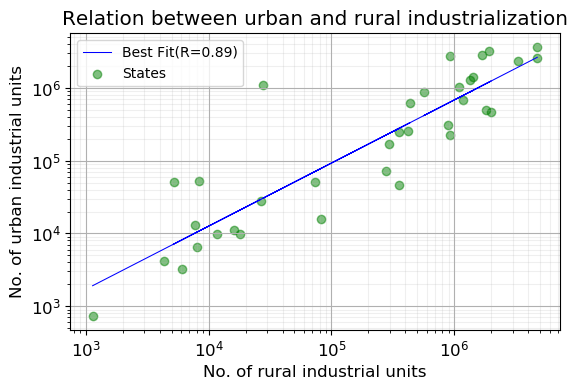

In [5]:
#--------------------------------SCATTERPLOT--------------------------------#

plt.rcParams.update({'lines.linewidth':0.75})
plt.rcParams.update({'font.size': 12})
fig, axes =plt.subplots(figsize=(6,4))


plt.subplot(1,1,1)
plt.title("Relation between urban and rural industrialization")

plt.rcParams.update({'font.size': 10})
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.scatter(all_r, all_u, marker = 'o', color='g',alpha=0.5, label='States')
plt.plot(all_r, fit_u, 'b', label='Best Fit(R={:.2f})'.format(reg.rvalue))
plt.xscale('log')
plt.yscale('log')


plt.xlabel("No. of rural industrial units")
plt.ylabel("No. of urban industrial units")
plt.legend()
plt.tight_layout()
plt.savefig('scatterplot.jpg')
plt.show()


In [6]:
#---------------------------DATA FOR BAR GRAPH--------------------------------#
states = np.array(df.iloc[:,0][:-1])
n = states.shape[0]
width = 0.35
index = np.arange(n)    

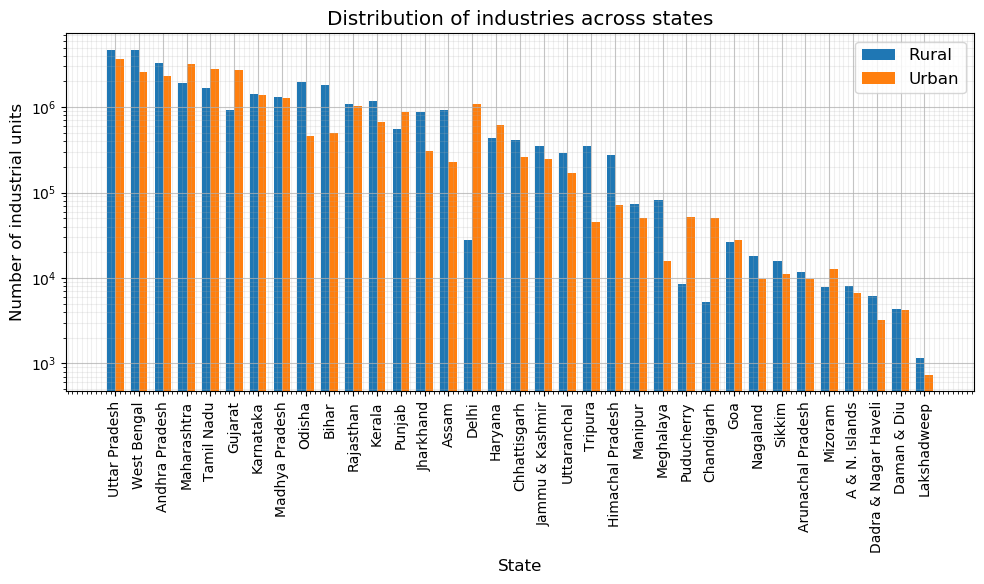

In [7]:
#--------------------------------BAR GRAPH--------------------------------#
plt.rcParams.update({'lines.linewidth':1})
fig, axes =plt.subplots(figsize=(10,6))
plt.rcParams.update({'font.size': 10})
plt.subplot(1,1,1)

p1 = plt.bar(index-width/2, all_r,width, label='Rural')
p2 = plt.bar(index+width/2, all_u,width, label='Urban')

plt.xticks(index,states,rotation=90,fontsize=10)
plt.grid(which='major', alpha=0.75)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)
plt.yscale('log')

plt.rcParams.update({'font.size': 12})
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of industrial units", fontsize=12)
plt.legend()
plt.title("Distribution of industries across states")
plt.tight_layout()
plt.savefig('bargraph.jpg')
plt.show()

In [8]:
#---------------------------DATA FOR BOX PLOT---------------------------#
state_total = np.array(df.iloc[:,-2][:-1])
r_owa = np.array(df.iloc[:,1][:-1])/state_total
r_e = np.array(df.iloc[:,2][:-1])/state_total
u_owa = np.array(df.iloc[:,4][:-1])/state_total
u_e = np.array(df.iloc[:,5][:-1])/state_total


boxdat = np.zeros((r_owa.shape[0],4))
boxdat[:,0] = r_owa
boxdat[:,1] = r_e
boxdat[:,2] = u_owa
boxdat[:,3] = u_e
boxdat = boxdat*100
xlabs = ["Rural_OAE","Rural_E","Urban_OAE", "Urban_E"]

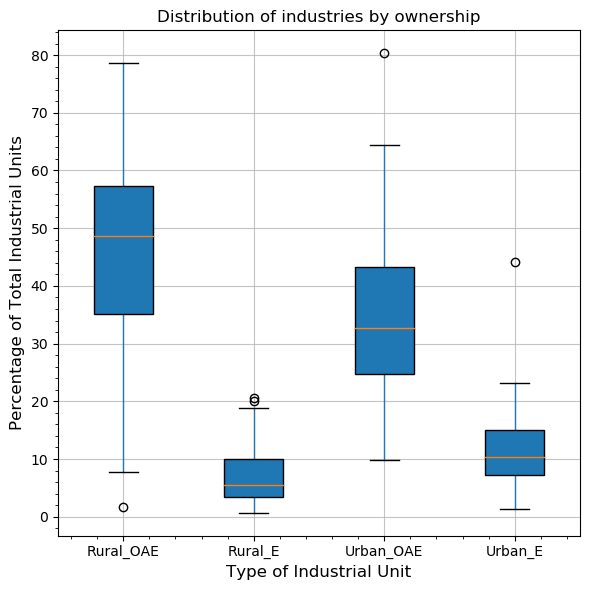

In [9]:
#--------------------------------BOX PLOT--------------------------------#
plt.rcParams.update({'lines.linewidth':1})
fig, axes =plt.subplots(figsize=(6,6))

plt.rcParams.update({'font.size': 10})
plt.subplot(1,1,1)
plt.title("Distribution of industries by ownership", fontsize=12)
plt.xlabel("Type of Industrial Unit", fontsize=12)
plt.ylabel("Percentage of Total Industrial Units", fontsize=12)
plt.grid(which='major', alpha=0.75)
plt.minorticks_on()
#plt.grid(which='minor', alpha=0.2)

plt.boxplot(boxdat, whiskerprops={'color' : 'tab:blue'}, patch_artist=True)

plt.xticks([1,2,3,4],xlabs)
plt.tight_layout()
plt.savefig('boxplot.jpg')

plt.show()